<a href="https://colab.research.google.com/github/sasomoto/Full-Stack-GNB-and-Perceptron-for-Diabetes-Prediction/blob/main/2022A7PS1377H%2C2022AAPS0508H%2C2022A7PS1367HML%2C2022A71334H_Assignment_4(Dhairya_Luthra%2CShashwat_sharma%2CAnimesh_Agrahari%2CUtkarsh_Singhal).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Assignment 4

## TEAM MEMBERS
1. Dhairya Luthra(2022A7PS1377H)
2. Shashwat Sharma(2022AAPS0508H)
3. Animesh Agrahari(2022A7PS1367H)
4. Utkarsh Singhal (2022A71334H)

## Objective
Train and evaluate two models—Naive Bayes and Perceptron—to classify diabetes types based on input features (age, blood sugar level, insulin level, and BMI). Compare the models' performance using metrics such as accuracy, precision, recall, and F1-score. Save both models for deployment in a Flask-based web application for real-time predictions.

---

## Task Outline

### Step 1: Import Libraries
- Import necessary libraries including `GaussianNB`, `Perceptron`, and `pickle` for model training, evaluation, and saving.

### Step 2: Data Preprocessing
1. **Load Dataset**: Load the dataset and separate it into features (X) and target (y).
2. **Train-Test Split**: Split data into training and test sets (80-20 split).
3. **Feature Scaling**: Apply scaling (StandardScaler or MinMaxScaler) if needed to improve model performance.

### Step 3: Train the Naive Bayes Model
- Initialize and train the Naive Bayes model on the training data.
- Use the trained model to make predictions on the test data.

### Step 4: Train the Perceptron Model
- Train a Perceptron model on the training data using either a library or custom implementation.
- Generate predictions on the test data.

### Step 5: Model Evaluation
- Evaluate both models using accuracy, precision, recall, and F1-score.
- Analyze the results, discussing each model’s strengths and weaknesses.

### Step 6: Save the Models with Pickle
- Save both trained models as `.pkl` files using the `pickle` library for future deployment.

### Step 7: Set Up Flask Backend
- Set up a Flask application to serve the models and create an endpoint (`/predict`) for real-time predictions.
- Enable CORS to allow cross-origin requests from the frontend.

### Step 8: Create the Frontend
- Develop a simple HTML + JavaScript interface with input fields for age, blood sugar, insulin, and BMI.
- Use JavaScript (fetch API) to send user inputs to the backend and display the predicted diabetes type on the page.

### Step 9: Implement K-Fold Cross-Validation
- Apply k-fold cross-validation to each model for a more robust performance evaluation.

### Step 10: Compare and Analyze Results
- Compare both models’ evaluation metrics across cross-validation results and highlight findings.


##Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import pandas as pd

csv_file_path = '/content/sample_data/diabetes.csv'

# Load the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
df.head()

,Glucose,Insulin,BMI,Age,Outcome
0,148,0,33.6,50,1
1,85,0,26.6,31,0
2,183,0,23.3,32,1
3,89,94,28.1,21,0
4,137,168,43.1,33,1


##Importing Libraries

In [ ]:
# Data handling and preprocessing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Machine learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Saving and loading models
import pickle




##Preprocessing the Data

### Checking for NULL Values

In [ ]:
missing_values = df.isnull().sum()
print("The missing values are:\n",missing_values)
missing_columns = df.columns[df.isnull().any()]
print("\nColumns with missing values:\n", missing_columns)

The missing values are:
 Glucose    0
Insulin    0
BMI        0
Age        0
Outcome    0
dtype: int64

Columns with missing values:
 Index([], dtype='object')


#### Since No NULL Values no need to impute

### Data Visualisation and Statistics

          Glucose     Insulin         BMI         Age     Outcome
count  768.000000  768.000000  768.000000  768.000000  768.000000
mean   120.894531   79.799479   31.992578   33.240885    0.348958
std     31.972618  115.244002    7.884160   11.760232    0.476951
min      0.000000    0.000000    0.000000   21.000000    0.000000
25%     99.000000    0.000000   27.300000   24.000000    0.000000
50%    117.000000   30.500000   32.000000   29.000000    0.000000
75%    140.250000  127.250000   36.600000   41.000000    1.000000
max    199.000000  846.000000   67.100000   81.000000    1.000000


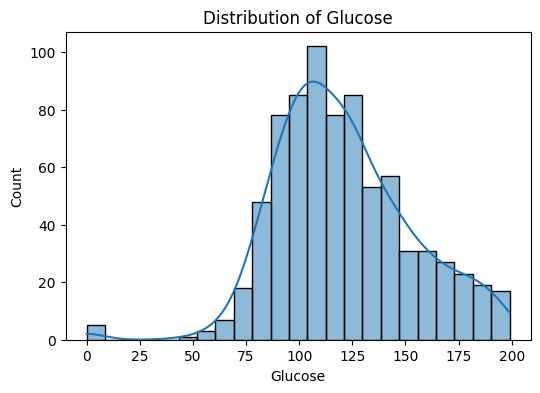

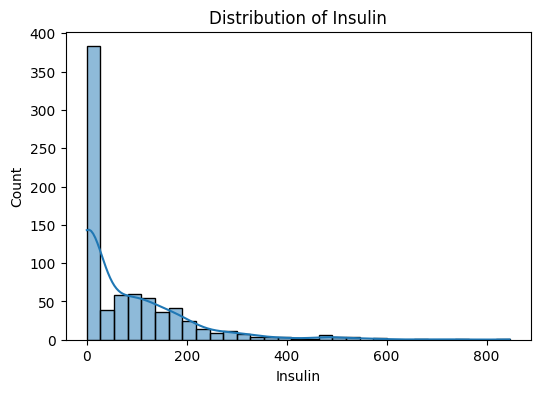

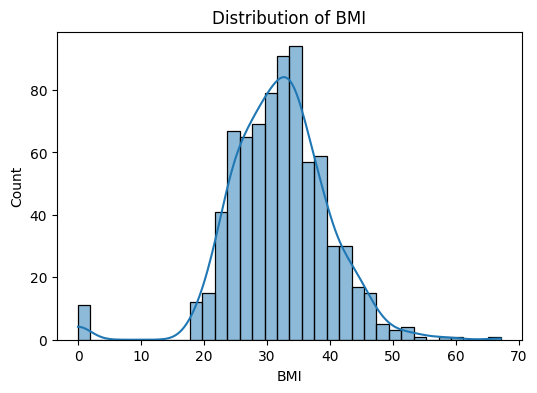

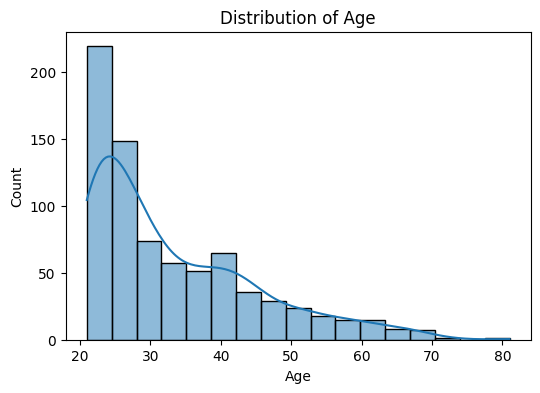

In [ ]:


# Summary statistics for each feature
print(df.describe())

# Visualizing the distribution of features
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through numerical columns and create histograms
for column in df.columns[0:-1]:  # Excluding Serial No. and target variable
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


### Scaling the Data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming df is your dataset loaded in a DataFrame
X = df[['Glucose', 'Insulin', 'BMI', 'Age']]
y = df['Outcome']

# Standard Scaling for Glucose, BMI, Age, and Insulin
scaler_standard = StandardScaler()
X_scaled = scaler_standard.fit_transform(X[['Glucose', 'BMI', 'Age', 'Insulin']])  # Scale the data
X_scaled = pd.DataFrame(X_scaled, columns=['Glucose', 'BMI', 'Age', 'Insulin'])  # Convert the numpy array back to a DataFrame

# Save the scaler to disk
with open('scaler_standard.pkl', 'wb') as scaler_file:
    pickle.dump(scaler_standard, scaler_file)

# Display the transformed data
X_scaled.head()


,Glucose,BMI,Age,Insulin
0,0.848324,0.204013,1.425995,-0.692891
1,-1.123396,-0.684422,-0.190672,-0.692891
2,1.943724,-1.103255,-0.105584,-0.692891
3,-0.998208,-0.494043,-1.041549,0.123302
4,0.504055,1.409746,-0.020496,0.765836


### Creating the Train Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df'
# Separate features and target
X = df[['Glucose', 'Insulin', 'BMI', 'Age']]
y = df['Outcome']

# Perform a train-test split (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## Implementing Naive Bayes and testing it

### Training the Model

In [ ]:
# Train Naïve Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = naive_bayes_model.predict(X_test)

### Model Evaluation

In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_nb)
confusion = confusion_matrix(y_test, y_pred_nb)
classification = classification_report(y_test, y_pred_nb)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification)

Accuracy: 0.75
Confusion Matrix:
[[80 19]
 [20 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## Implementing Perceptron and testing it

### Training the model

In [ ]:
# Train Perceptron model
perceptron_model = Perceptron(max_iter=10000, tol=1e-3, random_state=42)
perceptron_model.fit(X_train, y_train)



Perceptron(max_iter=10000, random_state=42, tol=0.0001)

In [ ]:
# Make predictions
y_pred_perceptron = perceptron_model.predict(X_test)



### Model Evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_perceptron)
confusion = confusion_matrix(y_test, y_pred_perceptron)
classification = classification_report(y_test, y_pred_perceptron)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification)

Accuracy: 0.58
Confusion Matrix:
[[71 28]
 [36 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.72      0.69        99
           1       0.40      0.35      0.37        55

    accuracy                           0.58       154
   macro avg       0.53      0.53      0.53       154
weighted avg       0.57      0.58      0.58       154



##Custom Implementation of Perceptron

### Class to implement perceptron

In [ ]:
df['Glucose'] = pd.to_numeric(df['Glucose'], errors='coerce')
df['Insulin'] = pd.to_numeric(df['Insulin'], errors='coerce')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Prepare the dataset
X = df[['Glucose', 'Insulin', 'BMI', 'Age']].values
y = df['Outcome'].values

# Convert y to -1 and 1 for binary classification (assuming outcomes are 0 and 1)
y = np.where(y == 0, -1, 1)  # Convert 0 to -1 and 1 stays as 1

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to {-1, 1}
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(linear_output)

                # Update rule: perceptron
                if y_predicted != y_[idx]:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.sign(linear_output)
        return np.where(y_predicted <= 0, 0, 1)


### Train the Model

In [ ]:
# Train the custom perceptron model
perceptron_model_c = CustomPerceptron(learning_rate=0.01, n_iterations=1000)
perceptron_model_c.fit(X_train, y_train)


In [ ]:

# Make predictions
y_pred_perceptron = perceptron_model_c.predict(X_test)

In [ ]:
#Convert predictions back to original labels (0 and 1)
y_pred_perceptron = np.where(y_pred_perceptron == -1, 0, 1)

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_perceptron)
confusion = confusion_matrix(y_test, y_pred_perceptron)
classification = classification_report(y_test, y_pred_perceptron)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification)

Accuracy: 0.36
Confusion Matrix:
[[ 0 99]
 [ 0 55]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        99
           1       0.36      1.00      0.53        55

    accuracy                           0.36       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.13      0.36      0.19       154



### Compare both models using evaluation metrics such as accuracy, precision,recall, and F1-score.
Highlight the strengths and weaknesses of each model based on the results.

#### Gaussian Naive Bayes

**Strengths:**
- **Higher Accuracy**: GNB achieved an accuracy of 75%, indicating it performed better overall compared to the Perceptron model.
- **Better Recall for Class 0**: The recall for class 0 (negative class) is 0.81, meaning it correctly identifies a high proportion of actual negatives.
- **Balanced Precision**: The precision for both classes is relatively balanced, with a slight advantage for class 0.

**Weaknesses:**
- **Lower Recall for Class 1**: The recall for class 1 (positive class) is 0.64, suggesting that GNB misses some positive cases, which could be critical depending on the application.
- **Assumption of Feature Independence**: GNB assumes that features are independent given the class label, which may not hold true in real-world datasets.

#### Perceptron

**Strengths:**
- **Simple Interpretability**: The Perceptron model provides a straightforward understanding of decision boundaries based on the input features.
- **Potential for Non-Linear Decision Boundaries**: With appropriate modifications (like adding hidden layers), a Perceptron can learn more complex decision boundaries.

**Weaknesses:**
- **Lower Overall Performance**: The accuracy of 58% indicates that the Perceptron is underperforming compared to GNB, possibly due to its linear decision-making nature.
- **Class Imbalance Issues**: The precision and recall for class 1 are notably lower (precision: 0.40, recall: 0.35), indicating the model struggles to identify positive cases effectively. This can be particularly problematic in scenarios where false negatives are costly.
- **Sensitive to Learning Rate and Initialization**: The performance can vary significantly based on the chosen learning rate and initial weights.

### Conclusion
In this comparison, the Gaussian Naive Bayes model clearly outperforms the custom Perceptron model in terms of accuracy and overall classification metrics. However, the choice between the two models should also consider the specific application, particularly how critical it is to minimize false negatives or false positives.

If improving the Perceptron model's performance is desired, techniques such as feature engineering, hyperparameter tuning, or using more advanced neural network architectures might help enhance its predictive capabilities.


In [ ]:
import pickle

# Save the Gaussian Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as nb_file:
    pickle.dump(naive_bayes_model, nb_file)

# Save the Custom Perceptron model
with open('perceptron_model.pkl', 'wb') as perc_file:
    pickle.dump(perceptron_model, perc_file)

print("Models have been saved successfully.")


Models have been saved successfully.


In [ ]:

from google.colab import files

# Save the Gaussian Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as nb_file:
    pickle.dump(naive_bayes_model, nb_file)

# Save the Custom Perceptron model
with open('perceptron_model.pkl', 'wb') as perc_file:
    pickle.dump(perceptron_model, perc_file)

print("Models have been saved successfully.")

# Download the models
files.download('naive_bayes_model.pkl')
files.download('perceptron_model.pkl')


Models have been saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Performing K fold Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
# Set the number of folds for cross-validationk = 5

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the Naïve Bayes model
nb_cv_scores = cross_val_score(naive_bayes_model, X, y, cv=kf, scoring='accuracy')
print(f"Naïve Bayes - Cross-Validation Accuracy Scores: {nb_cv_scores}")
print(f"Naïve Bayes - Mean Accuracy: {nb_cv_scores.mean():.4f} ± {nb_cv_scores.std():.4f}")

# Evaluate the Perceptron model
per_cv_scores = cross_val_score(perceptron_model, X, y, cv=kf, scoring='accuracy')
print(f"Perceptron - Cross-Validation Accuracy Scores: {per_cv_scores}")
print(f"Perceptron - Mean Accuracy: {per_cv_scores.mean():.4f} ± {per_cv_scores.std():.4f}")


Naïve Bayes - Cross-Validation Accuracy Scores: [0.74675325 0.74025974 0.74025974 0.81045752 0.73202614]
Naïve Bayes - Mean Accuracy: 0.7540 ± 0.0286
Perceptron - Cross-Validation Accuracy Scores: [0.48701299 0.66233766 0.3961039  0.50326797 0.62091503]
Perceptron - Mean Accuracy: 0.5339 ± 0.0961


# Model Performance Comparison

## 1. Accuracy Scores
- **Naïve Bayes**
  - **Cross-Validation Accuracy Scores:** `[0.7468, 0.7403, 0.7403, 0.8105, 0.7320]`
  - **Mean Accuracy:** `0.7540`
  - **Standard Deviation:** `0.0286`

- **Perceptron**
  - **Cross-Validation Accuracy Scores:** `[0.4870, 0.6623, 0.3961, 0.5033, 0.6209]`
  - **Mean Accuracy:** `0.5339`
  - **Standard Deviation:** `0.0961`

## 2. Analysis of Results
- **Mean Accuracy:**
  - The **Naïve Bayes model** achieved a mean accuracy of **75.40%**, indicating that it performs relatively well on this dataset.
  - The **Perceptron model**, on the other hand, had a mean accuracy of **53.39%**, suggesting that it struggles to classify the data correctly in comparison to Naïve Bayes.

- **Variability:**
  - The **standard deviation** for Naïve Bayes is **0.0286**, which shows that its performance is quite stable across different folds of the dataset.
  - The **Perceptron** model has a **standard deviation of 0.0961**, indicating greater variability in performance, which may suggest that its predictions are more sensitive to the specific training and testing data subsets used in cross-validation.

## 3. Strengths and Weaknesses
- **Naïve Bayes:**
  - **Strengths:**
    - Generally performs well for classification tasks with smaller datasets.
    - Works well with categorical data and can handle continuous data when appropriately transformed.
    - Stable and less sensitive to variations in the training data, as indicated by lower standard deviation.
  - **Weaknesses:**
    - Assumes independence among features, which may not always be true in real-world datasets.
    - Might struggle if features are highly correlated.

- **Perceptron:**
  - **Strengths:**
    - A simple yet powerful linear classifier that can handle linearly separable data.
    - Capable of learning complex decision boundaries with appropriate feature engineering.
  - **Weaknesses:**
    - Poor performance as indicated by the mean accuracy; it struggles with this dataset.
    - Sensitive to the scale of input features, which could lead to underperformance if the data isn't well-prepared.
    - May not converge if the data isn't linearly separable or if the learning rate is not appropriately set.

## Conclusion
Based on the performance metrics, **Naïve Bayes** is the superior model for this specific diabetes dataset, yielding a higher mean accuracy and more stable performance across different folds. In contrast, the **Perceptron** model shows lower accuracy and higher variability, indicating that it may not be suitable for this classification task without further tuning and feature engineering.
